# Task 1 - Distribution of genes among the different clusters - 3_thick_branched
This notebook analyses the distribution of individual genes among the different clusters.

This notebook is based on the single-cell tutorial (https://github.com/theislab/single-cell-tutorial). For further explanations of the applied methods please refer to above source.

In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import os
from os import listdir
from os.path import isfile, join
import logging

In [2]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3

### Load adata

In [3]:
adata = sc.read_h5ad('../data/adata/rev_processed_adata3.h5ad')
adata.obs

sample_id sample_nr  donor  \
AAACCCACAAGTTGGG-1-1-0-0-0-0  3_thick_branched         0  mouse   
AAACCCACATAAGATG-1-1-0-0-0-0  3_thick_branched         0  mouse   
AAACCCAGTCTCGGAC-1-1-0-0-0-0  3_thick_branched         0  mouse   
AAACCCATCGTGCTCT-1-1-0-0-0-0  3_thick_branched         0  mouse   
AAACGAAAGGCTTAAA-1-1-0-0-0-0  3_thick_branched         0  mouse   
...                                        ...       ...    ...   
TTTGTTGGTATCGCAT-1-1-0-0-0-0  3_thick_branched         0  mouse   
TTTGTTGGTCTAGGCC-1-1-0-0-0-0  3_thick_branched         0  mouse   
TTTGTTGGTGCGCTCA-1-1-0-0-0-0  3_thick_branched         0  mouse   
TTTGTTGGTGGGTCAA-1-1-0-0-0-0  3_thick_branched         0  mouse   
TTTGTTGGTTCCGGTG-1-1-0-0-0-0  3_thick_branched         0  mouse   

                              n_genes_by_counts  log1p_n_genes_by_counts  \
AAACCCACAAGTTGGG-1-1-0-0-0-0               7545                 8.928773   
AAACCCACATAAGATG-1-1-0-0-0-0               6248                 8.740177   
AAACCCAGTCTCGGAC-1-1-0-0-0-0               5844                 8.673342   
AAACCCATCGTGCTCT-1-1-0-0-0-0               5912                 8.684909   
AAACGAAAGGCTTAAA-1-1-0-0-0-0               6749                 8.817298   
...                                         ...                      ...   
TTTGTTGGTATCGCAT-1-1-0-0-0-0               7482                 8.920389   
TTTGTTGGTCTAGGCC-1-1-0-0-0-0               7289                 8.894259   
TTTGTTGGTGCGCTCA-1-1-0-0-0-0               5937                 8.689128   
TTTGTTGGTGGGTCAA-1-1-0-0-0-0               5932                 8.688285   
TTTGTTGGTTCCGGTG-1-1-0-0-0-0               6602                 8.795279   

                              total_counts  log1p_total_counts  \
AAACCCACAAGTTGGG-1-1-0-0-0-0       70901.0           11.169054   
AAACCCACATAAGATG-1-1-0-0-0-0       43824.0           10.687960   
AAACCCAGTCTCGGAC-1-1-0-0-0-0       45365.0           10.722518   
AAACCCATCGTGCTCT-1-1-0-0-0-0       32745.0           10.396536   
AAACGAAAGGCTTAAA-1-1-0-0-0-0       52662.0           10.871669   
...                                    ...                 ...   
TTTGTTGGTATCGCAT-1-1-0-0-0-0       74828.0           11.222960   
TTTGTTGGTCTAGGCC-1-1-0-0-0-0       58850.0           10.982764   
TTTGTTGGTGCGCTCA-1-1-0-0-0-0       38864.0           10.567849   
TTTGTTGGTGGGTCAA-1-1-0-0-0-0       33986.0           10.433733   
TTTGTTGGTTCCGGTG-1-1-0-0-0-0       42179.0           10.649701   

                              pct_counts_in_top_50_genes  \
AAACCCACAAGTTGGG-1-1-0-0-0-0                   22.194327   
AAACCCACATAAGATG-1-1-0-0-0-0                   26.024553   
AAACCCAGTCTCGGAC-1-1-0-0-0-0                   30.232558   
AAACCCATCGTGCTCT-1-1-0-0-0-0                   21.823179   
AAACGAAAGGCTTAAA-1-1-0-0-0-0                   28.316433   
...                                                  ...   
TTTGTTGGTATCGCAT-1-1-0-0-0-0                   22.780243   
TTTGTTGGTCTAGGCC-1-1-0-0-0-0                   22.963466   
TTTGTTGGTGCGCTCA-1-1-0-0-0-0                   29.304755   
TTTGTTGGTGGGTCAA-1-1-0-0-0-0                   22.991820   
TTTGTTGGTTCCGGTG-1-1-0-0-0-0                   22.862088   

                              pct_counts_in_top_100_genes  \
AAACCCACAAGTTGGG-1-1-0-0-0-0                    29.909310   
AAACCCACATAAGATG-1-1-0-0-0-0                    33.084611   
AAACCCAGTCTCGGAC-1-1-0-0-0-0                    38.631103   
AAACCCATCGTGCTCT-1-1-0-0-0-0                    28.615056   
AAACGAAAGGCTTAAA-1-1-0-0-0-0                    35.754434   
...                                                   ...   
TTTGTTGGTATCGCAT-1-1-0-0-0-0                    29.677393   
TTTGTTGGTCTAGGCC-1-1-0-0-0-0                    30.688190   
TTTGTTGGTGCGCTCA-1-1-0-0-0-0                    36.761527   
TTTGTTGGTGGGTCAA-1-1-0-0-0-0                    29.656329   
TTTGTTGGTTCCGGTG-1-1-0-0-0-0                    29.832381   

                              pct_counts_in_top_200_genes  \
AAACCCACAAG

In [4]:
adata.var

feature_types     mt gene_symbols-0-0-0-0-0-0  \
ENSMUSG00000051285  Gene Expression  False                   Pcmtd1   
ENSMUSG00000039748  Gene Expression  False                     Exo1   
ENSMUSG00000057363  Gene Expression  False                     Uxs1   
ENSMUSG00000038702  Gene Expression  False                     Dsel   
ENSMUSG00000033021  Gene Expression  False                    Gmppa   
...                             ...    ...                      ...   
ENSMUSG00000064367  Gene Expression  False                   mt-Nd5   
ENSMUSG00000064368  Gene Expression  False                   mt-Nd6   
ENSMUSG00000064370  Gene Expression  False                  mt-Cytb   
ENSMUSG00000095041  Gene Expression  False       ENSMUSG00000095041   
ENSMUSG00000095742  Gene Expression  False       ENSMUSG00000095742   

                    n_cells_by_counts-0-0-0-0-0-0  mean_counts-0-0-0-0-0-0  \
ENSMUSG00000051285                           4892                 2.636992   
ENSMUSG00000039748                            106                 0.029674   
ENSMUSG00000057363                           3639                 1.102132   
ENSMUSG00000038702                           1867                 0.416307   
ENSMUSG00000033021                           2448                 0.506338   
...                                           ...                      ...   
ENSMUSG00000064367                           6188                44.415154   
ENSMUSG00000064368                           5237                 4.979113   
ENSMUSG00000064370                           6703               183.073898   
ENSMUSG00000095041                           5425                 7.305099   
ENSMUSG00000095742                            638                 0.099395   

                    log1p_mean_counts-0-0-0-0-0-0  \
ENSMUSG00000051285                       1.291157   
ENSMUSG00000039748                       0.029243   
ENSMUSG00000057363                       0.742952   
ENSMUSG00000038702                       0.348052   
ENSMUSG00000033021                       0.409682   
...                                           ...   
ENSMUSG00000064367                       3.815846   
ENSMUSG00000064368                       1.788272   
ENSMUSG00000064370                       5.215337   
ENSMUSG00000095041                       2.116870   
ENSMUSG00000095742                       0.094760   

                    pct_dropout_by_counts-0-0-0-0-0-0  \
ENSMUSG00000051285                          29.530395   
ENSMUSG00000039748                          98.473063   
ENSMUSG00000057363                          47.579948   
ENSMUSG00000038702                          73.105733   
ENSMUSG00000033021                          64.736387   
...                                               ...   
ENSMUSG00000064367                          10.861423   
ENSMUSG00000064368                          24.560645   
ENSMUSG00000064370                           3.442812   
ENSMUSG00000095041                          21.852492   
ENSMUSG00000095742                          90.809565   

                    total_counts-0-0-0-0-0-0  log1p_total_counts-0-0-0-0-0-0  \
ENSMUSG00000051285                   18306.0                        9.815039   
ENSMUSG00000039748                     206.0                        5.332719   
ENSMUSG00000057363                    7651.0                        8.942722   
ENSMUSG00000038702                    2890.0                        7.969358   
ENSMUSG00000033021                    3515.0                        8.165079   
...                                      ...                             ...   
ENSMUSG00000064367                  308330.0                       12.638929   
ENSMUSG00000064368                   34565.0                       10.450625   
ENSMUSG00000064370                 1270899.0                       14.055236   
ENSMUSG00000095041                   50712.0                       10.833938   
ENSMUSG00000095742            

<a id="Clustering"></a>

## Clustering

In [5]:
# Perform clustering - using highly variable genes
# sc.tl.louvain(adata, key_added='louvain_r1')
sc.tl.louvain(adata, resolution=0.5, key_added='louvain_r0.5', random_state=10)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 5 clusters and added
    'merged_louvain', the cluster labels (adata.obs, categorical) (0:00:00)


In [6]:
import pandas as pd

def merge_clusters(adata):
    # Create a mapping for the clusters to be merged
    merge_map = {
        '0': '0',
        '1': '1',
        '2': '0',
        '3': '2',
        '4': '3',
    }
    
    # Use the pandas `map` function to remap the clusters
    adata.obs['merged_louvain'] = adata.obs['louvain_r0.5'].map(merge_map).astype('category')
    
    # Update the categories for the new cluster labels
    adata.obs['merged_louvain'] = adata.obs['merged_louvain'].cat.set_categories(['0', '1', '2', '3'])

# Assuming `adata` is your AnnData object
merge_clusters(adata)

/Users/till.richter/anaconda3/envs/celldreamer/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


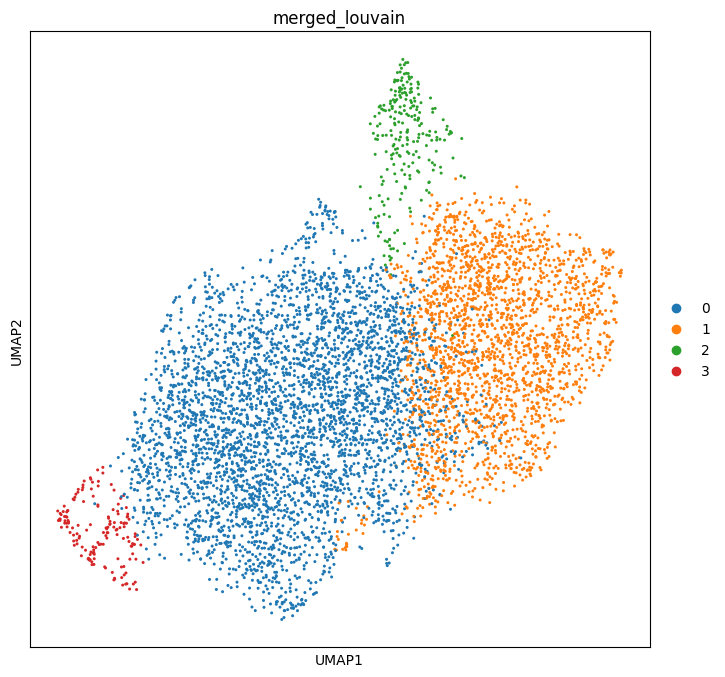

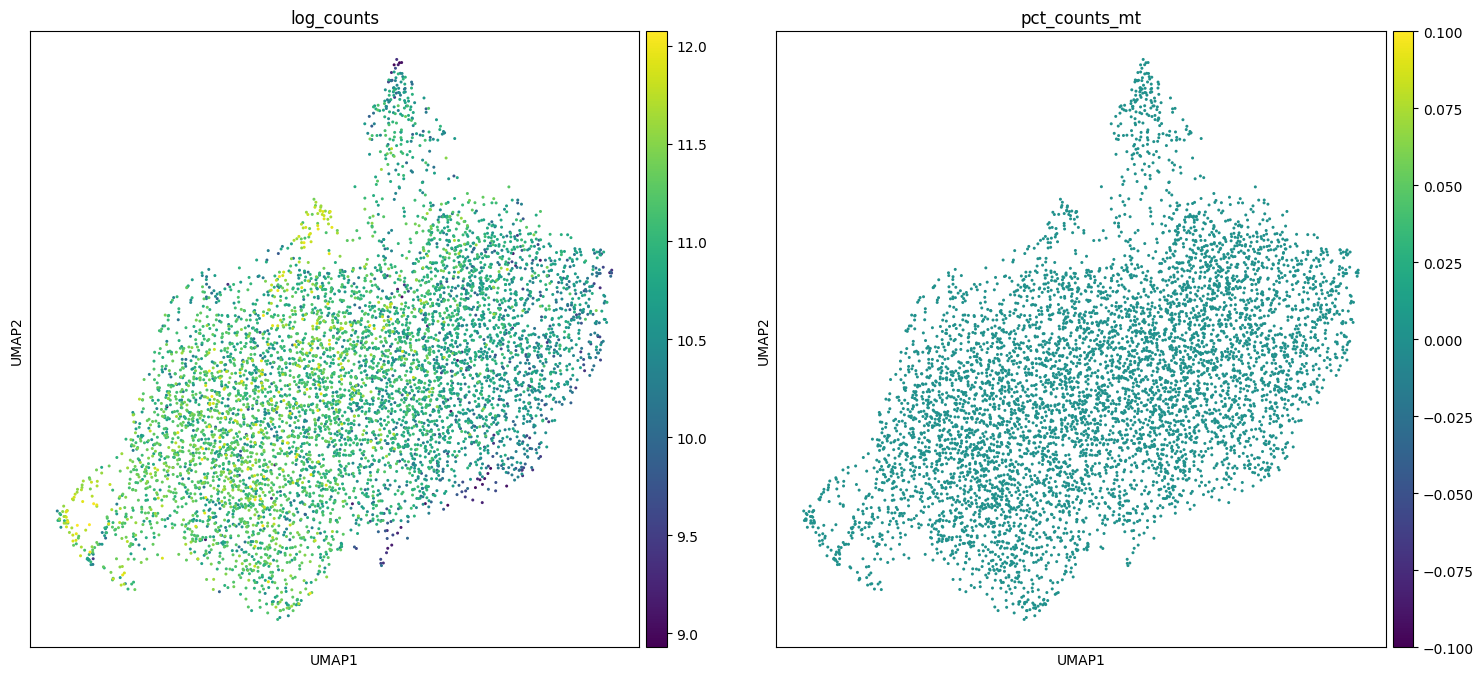

In [7]:
# Analysis sees 3 classes here
# Visualize the clustering and how this is reflected by different technical covariates
sc.pl.umap(adata, color=['merged_louvain'])

sc.pl.umap(adata, color=['log_counts', 'pct_counts_mt'])

/Users/till.richter/anaconda3/envs/celldreamer/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


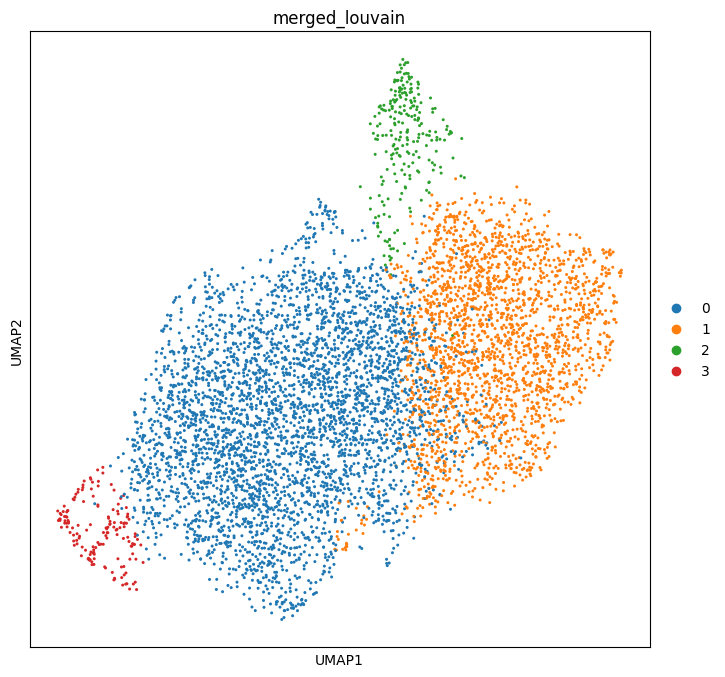

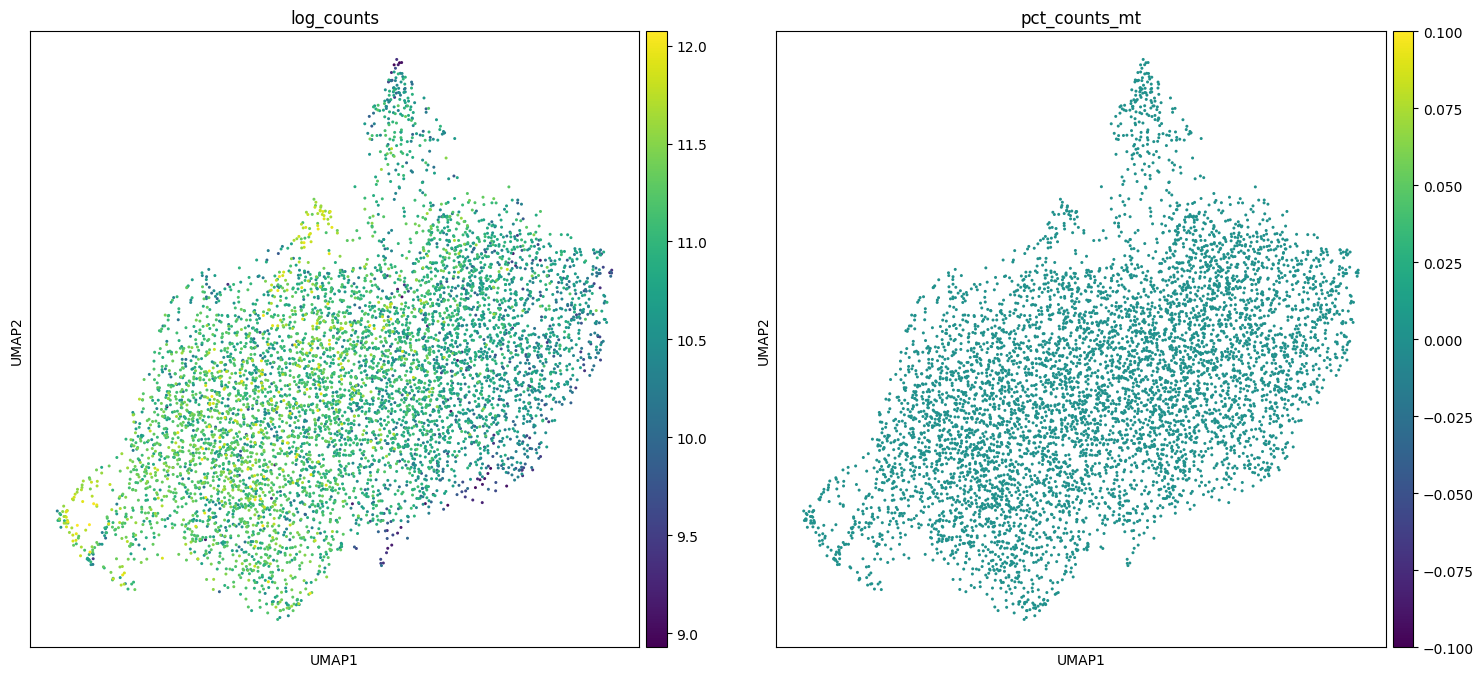

In [8]:
# Analysis sees 3 classes here
# Visualize the clustering and how this is reflected by different technical covariates
sc.pl.umap(adata, color=['merged_louvain'], save='umap_3_thick_branched.pdf')
# os.rename("figures/umap3_thick_branched.pdf", 
#           "../rev_results/task1/3_thick_branched/UMAP.pdf")

sc.pl.umap(adata, color=['log_counts', 'pct_counts_mt'], save='umap_counts_3_thick_branched.pdf')
# os.rename("figures/umap/3_thick_branched/UMAP_counts.pdf", 
#           "../rev_results/task1/3_thick_branched/UMAP_counts.pdf")

<a id="Markers"></a>

## Marker genes & cluster annotation

In [9]:
# Create a new AnnData object with gene symbols as var indices
adata_tmp = sc.AnnData(
    X=adata.X,  # Assuming you want to keep the same expression data
    obs=adata.obs.copy(),  # Copy the obs information from the original AnnData
)

# Set the gene symbols as var indices
adata_tmp.var.index = adata.var['gene_symbols-0-0-0-0-0-0']

In [10]:
# Perform gene ranking on the modified AnnData object
sc.tl.rank_genes_groups(adata_tmp, groupby='merged_louvain', key_added='rank_genes_merged_louvain')



ranking genes
    finished: added to `.uns['rank_genes_merged_louvain']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


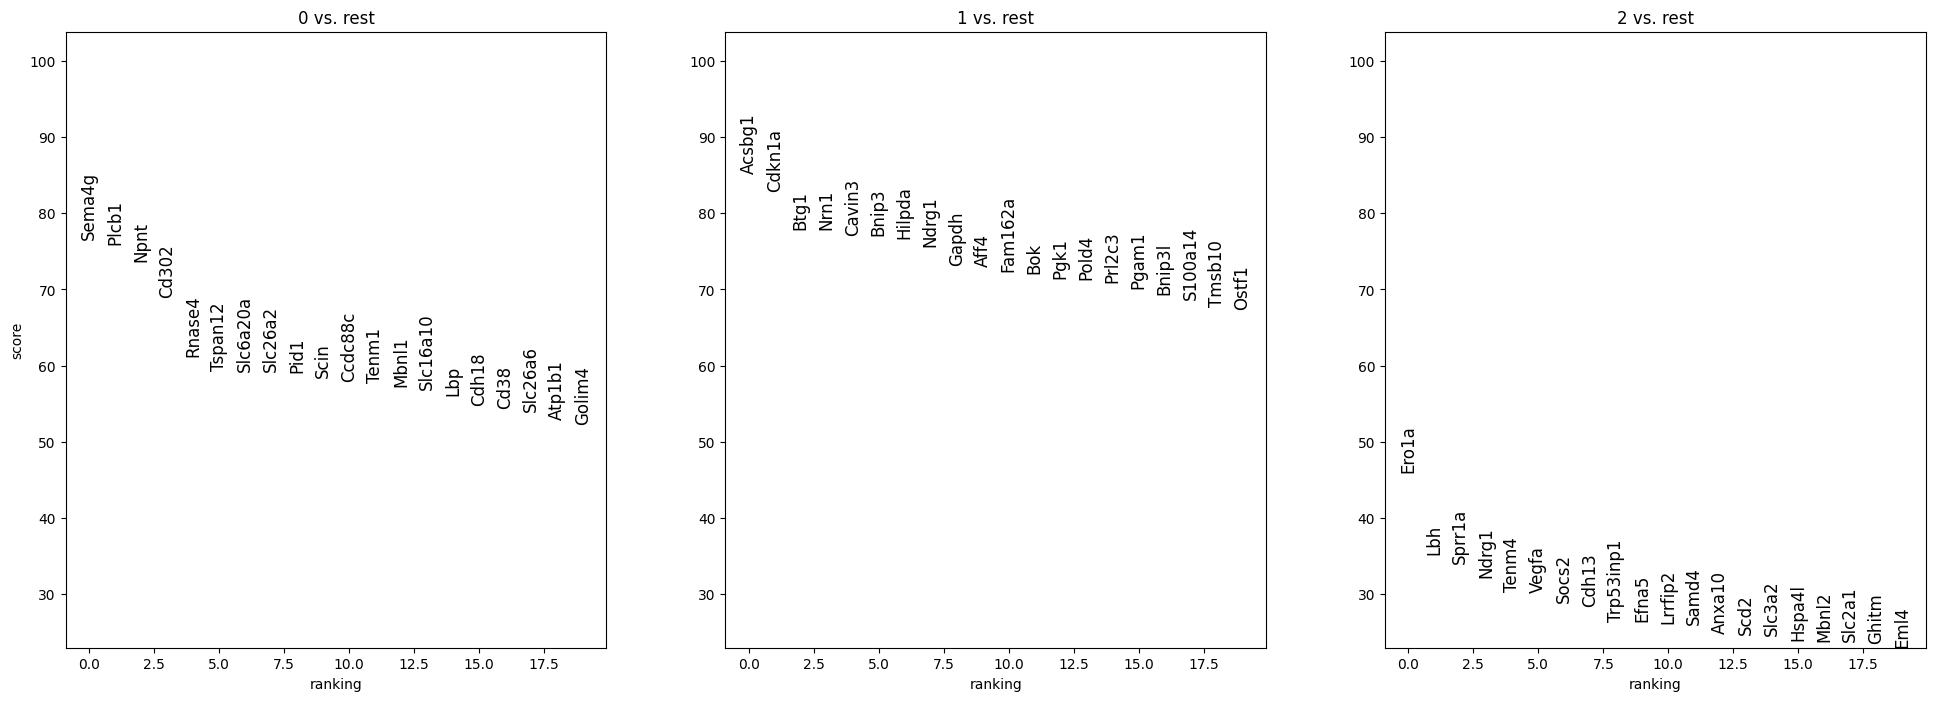

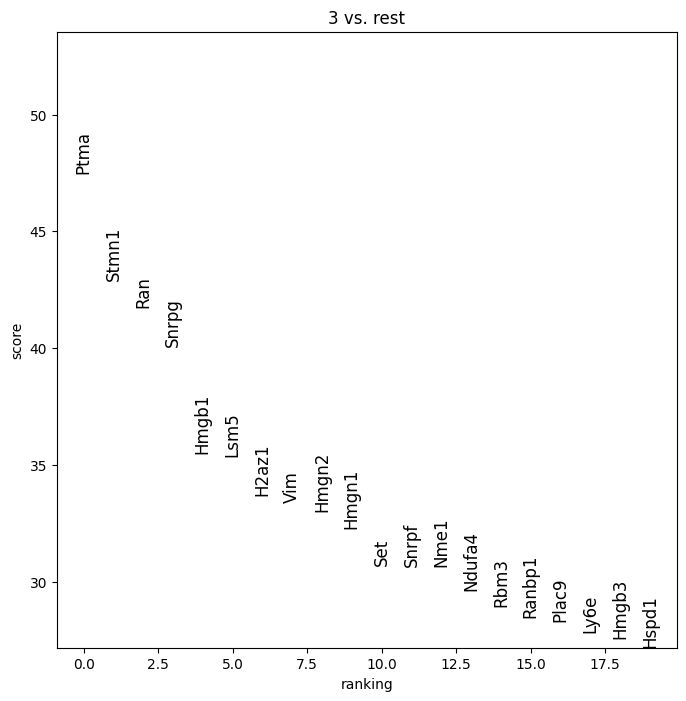

In [11]:
# Visualize the results using gene symbols
sc.pl.rank_genes_groups(adata_tmp, key='rank_genes_merged_louvain', groups=['0', '1', '2'], fontsize=12)
sc.pl.rank_genes_groups(adata_tmp, key='rank_genes_merged_louvain', groups=['3'], fontsize=12)

In [13]:
# Define a nice colour map for gene expression
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

Below we plot genes of particular interest within the clusters

### Cluster 0

Encrypted symbol for  Sema4g is  ENSMUSG00000025207


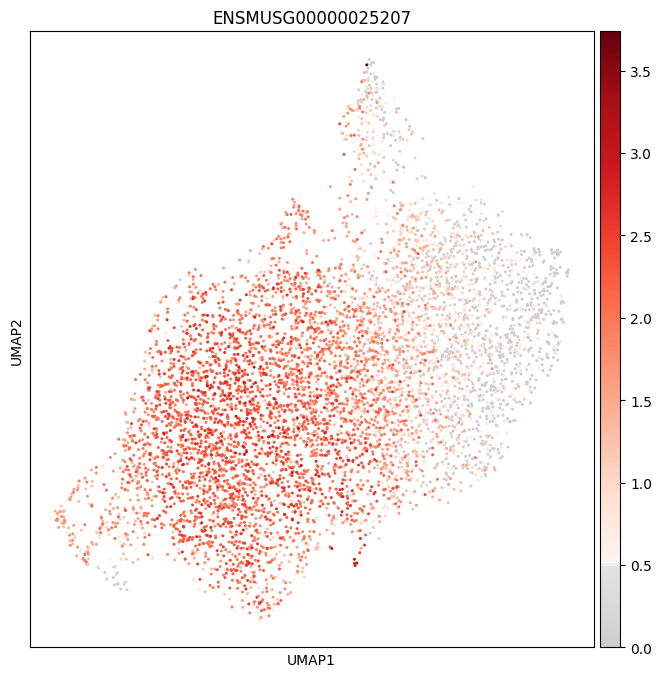

Encrypted symbol for  Plcb1 is  ENSMUSG00000051177


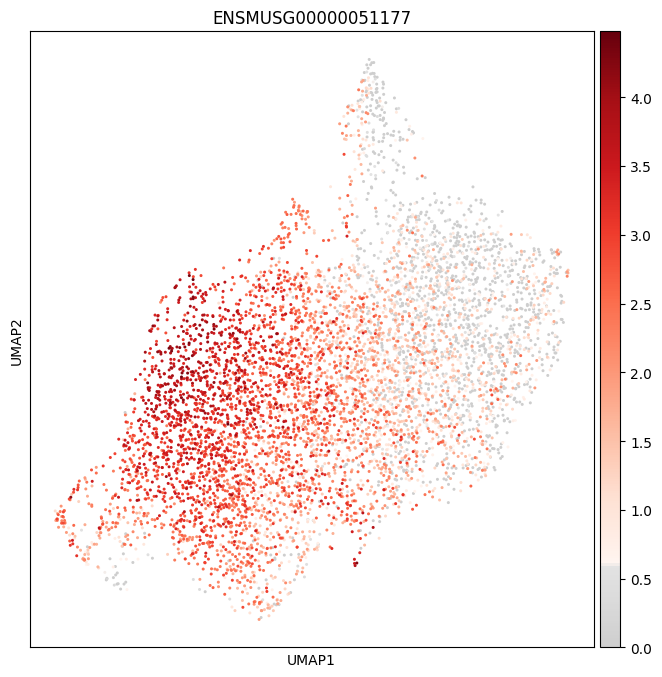

Encrypted symbol for  Npnt is  ENSMUSG00000040998


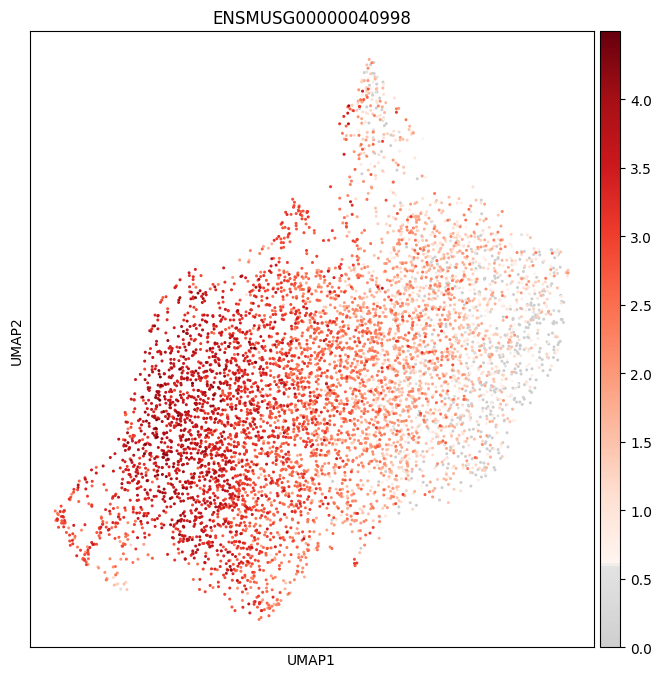

Encrypted symbol for  Cd302 is  ENSMUSG00000060703


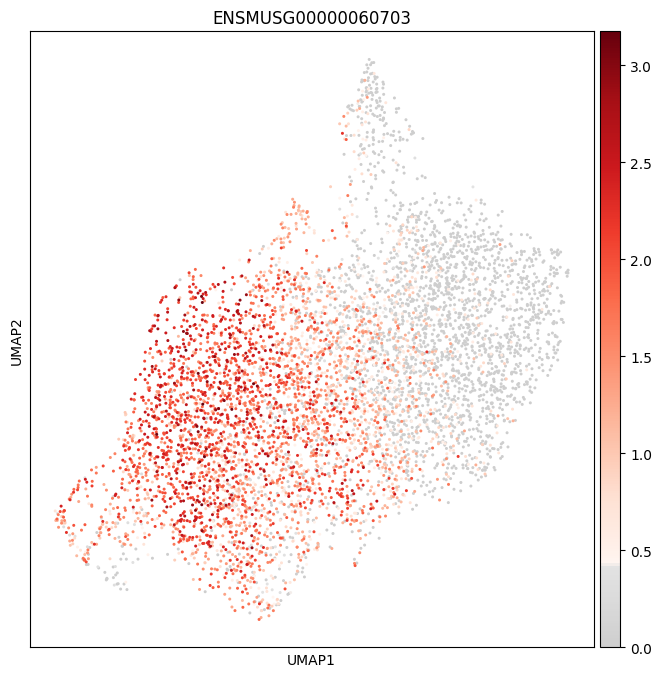

In [14]:
gene_symbols = ['Sema4g', 'Plcb1', 'Npnt', 'Cd302']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/3_thick_branched_Cluster0_' + gene_symbol + '.pdf')


## Cluster 1

Encrypted symbol for  Acsbg1 is  ENSMUSG00000032281


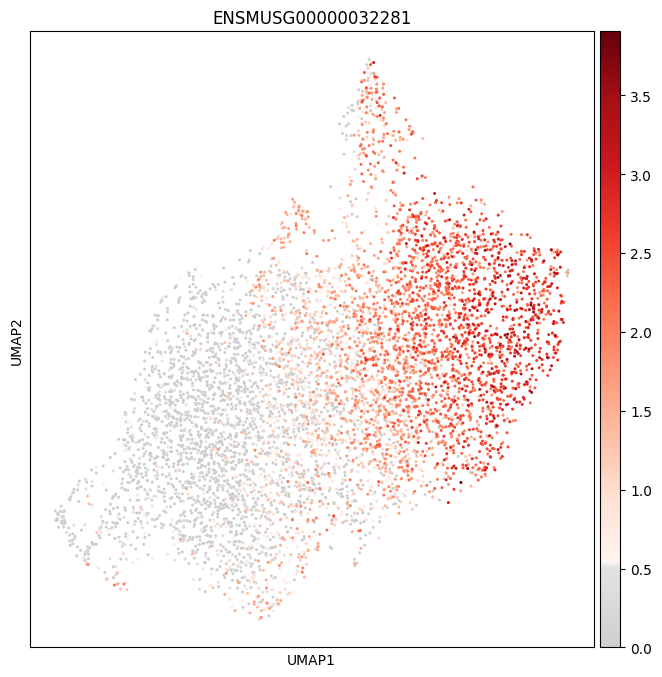

Encrypted symbol for  Cdkn1a is  ENSMUSG00000023067


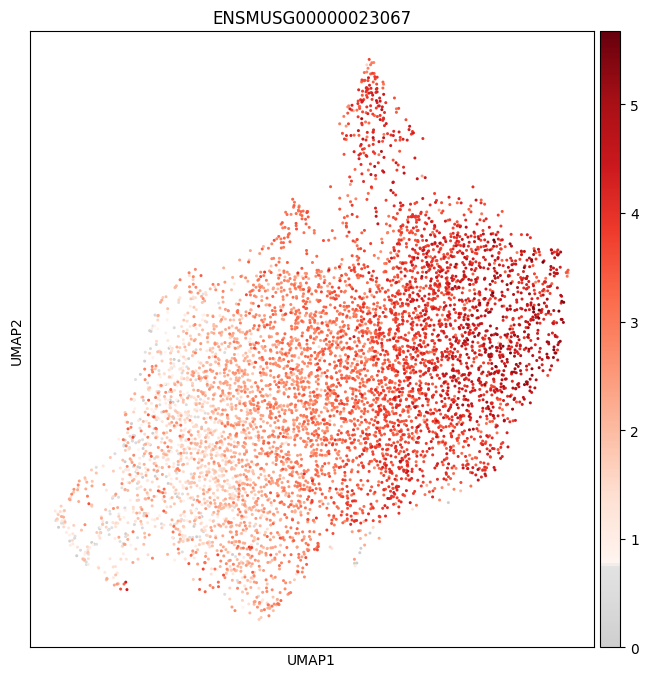

Encrypted symbol for  Btg1 is  ENSMUSG00000036478


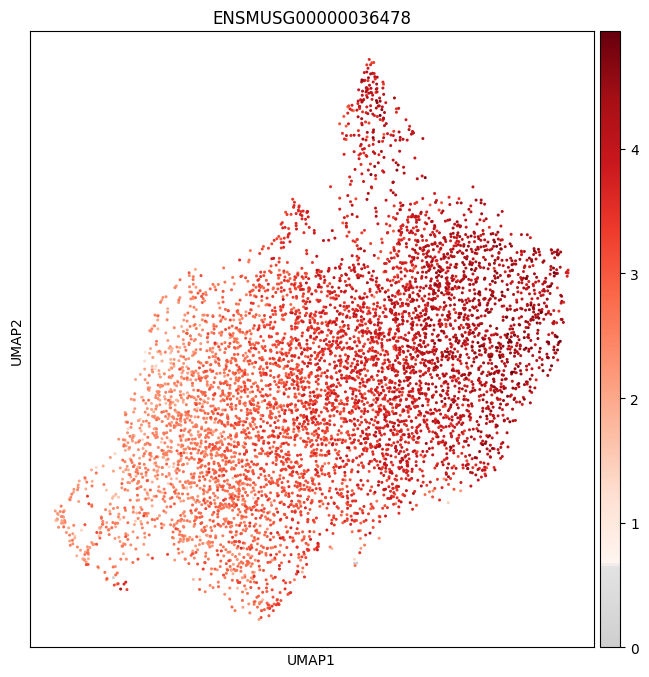

Encrypted symbol for  Nrn1 is  ENSMUSG00000039114


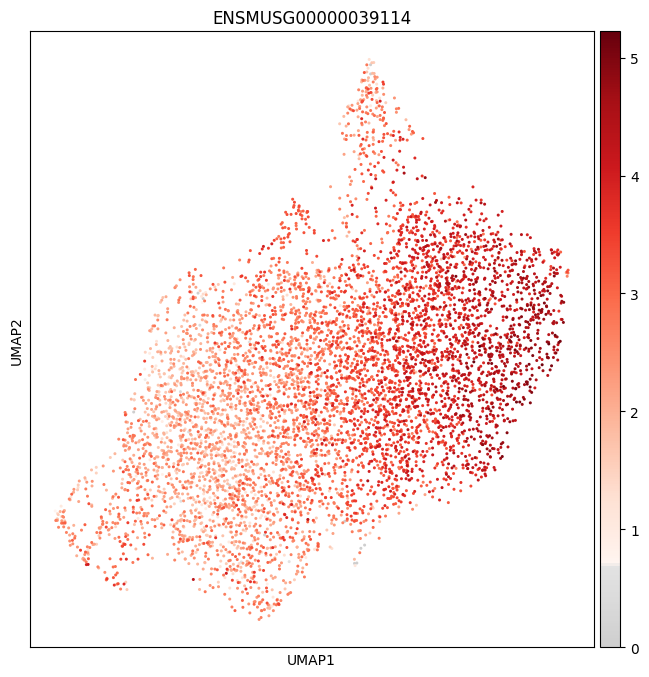

In [15]:
gene_symbols = ['Acsbg1', 'Cdkn1a', 'Btg1', 'Nrn1']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/3_thick_branched_Cluster1_' + gene_symbol + '.pdf')


## Cluster 2

Encrypted symbol for  Ero1a is  ENSMUSG00000021831


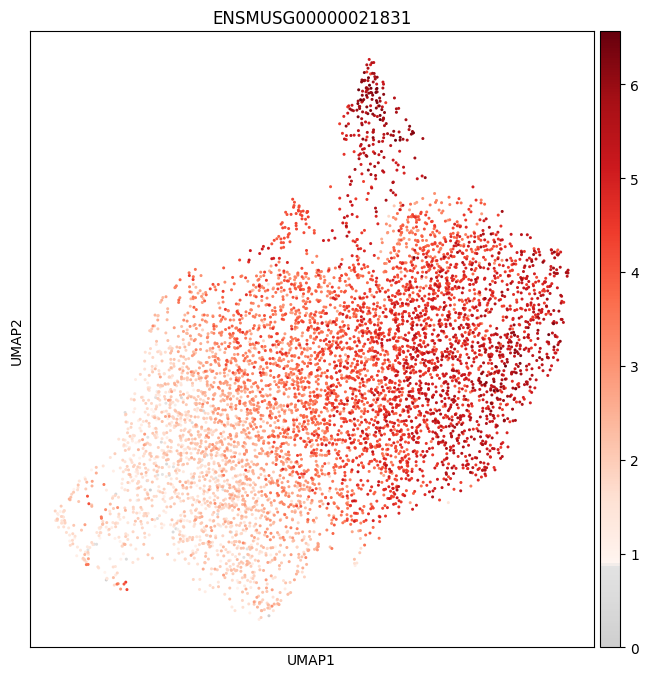

Encrypted symbol for  Lbh is  ENSMUSG00000024063


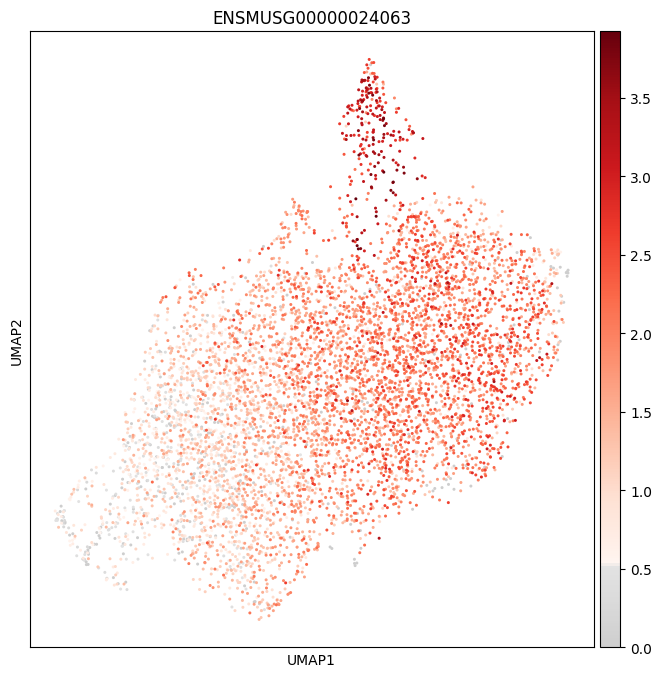

Encrypted symbol for  Sprr1a is  ENSMUSG00000050359


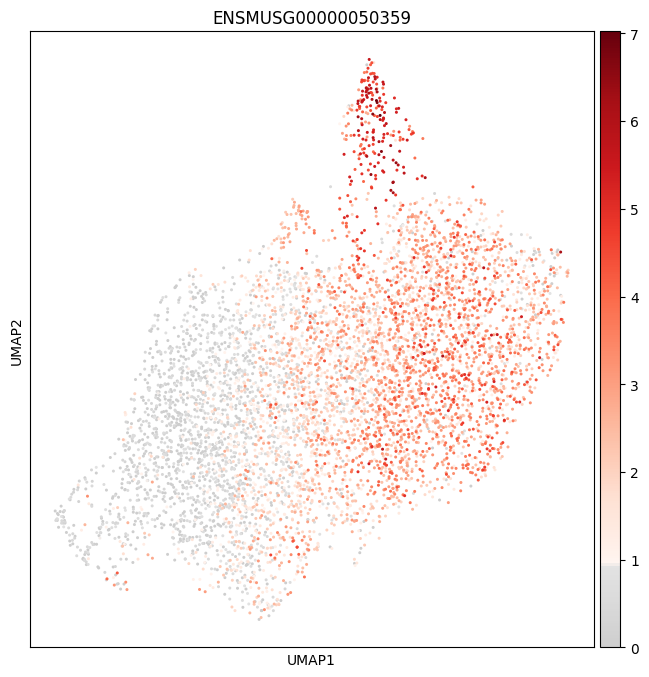

Encrypted symbol for  Ndrg1 is  ENSMUSG00000005125


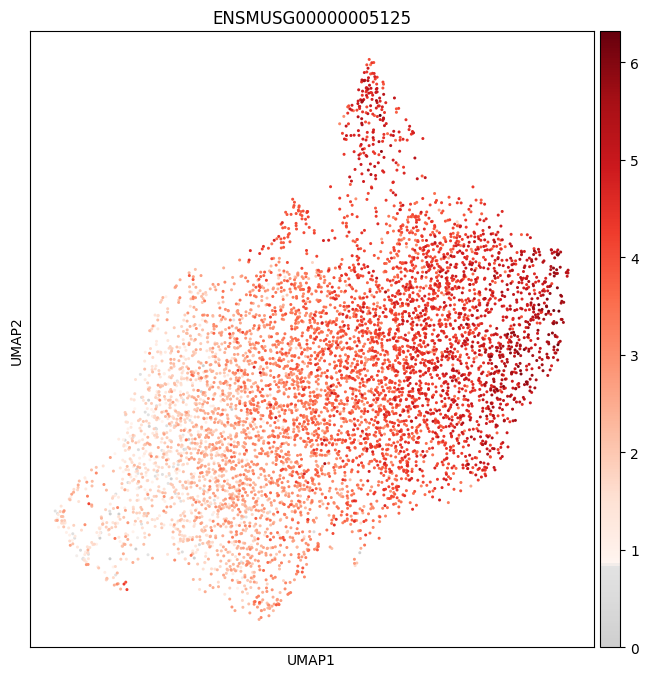

In [16]:
gene_symbols = ['Ero1a', 'Lbh', 'Sprr1a', 'Ndrg1']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/3_thick_branched_Cluster2_' + gene_symbol + '.pdf')


## Cluster 3

Encrypted symbol for  Ptma is  ENSMUSG00000026238


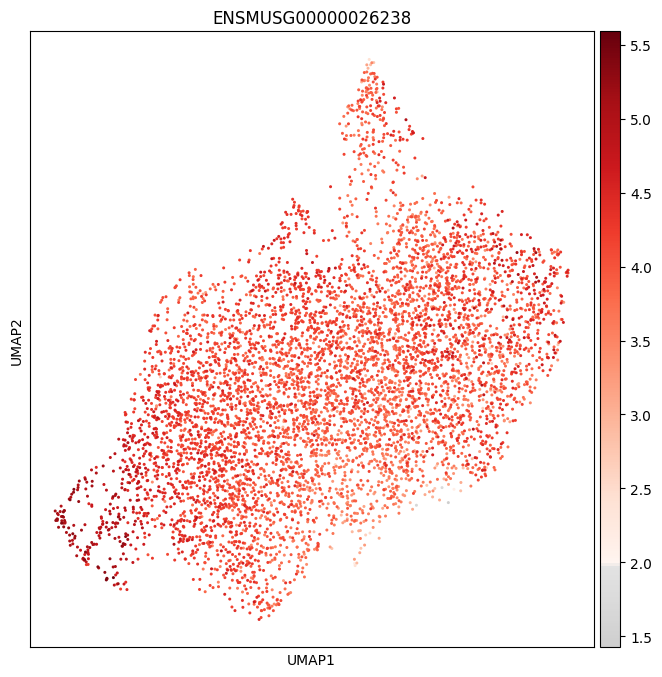

Encrypted symbol for  Stmn1 is  ENSMUSG00000028832


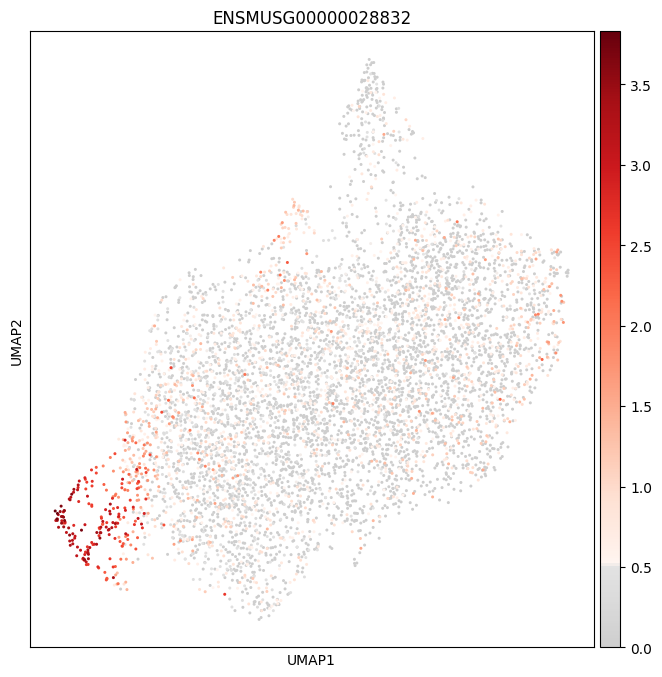

Encrypted symbol for  Ran is  ENSMUSG00000029430


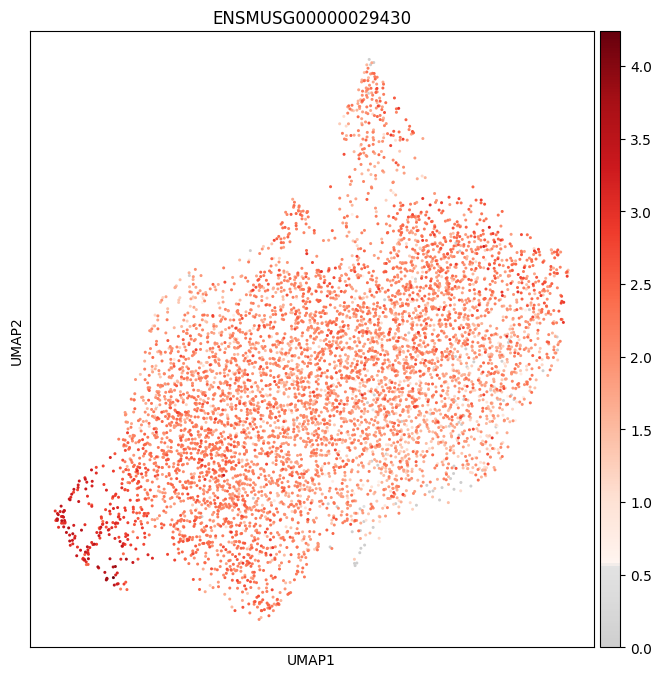

Encrypted symbol for  Snrpg is  ENSMUSG00000057278


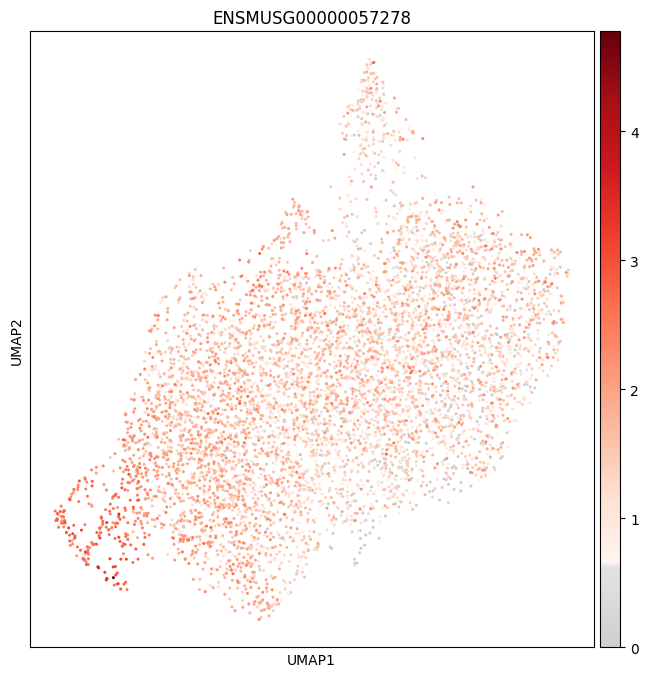

In [17]:
gene_symbols = ['Ptma', 'Stmn1', 'Ran', 'Snrpg']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/3_thick_branched_Cluster3_' + gene_symbol + '.pdf')


Encrypted symbol for  Ptma is  ENSMUSG00000026238


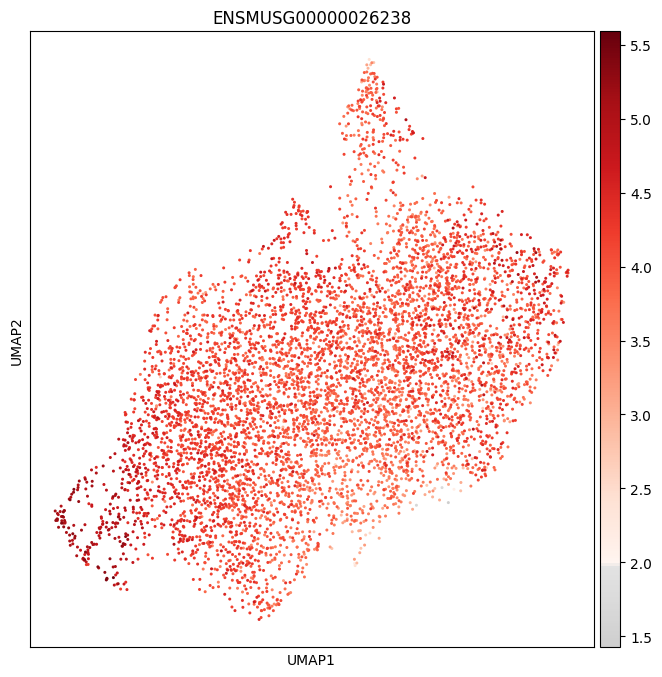

Encrypted symbol for  Stmn1 is  ENSMUSG00000028832


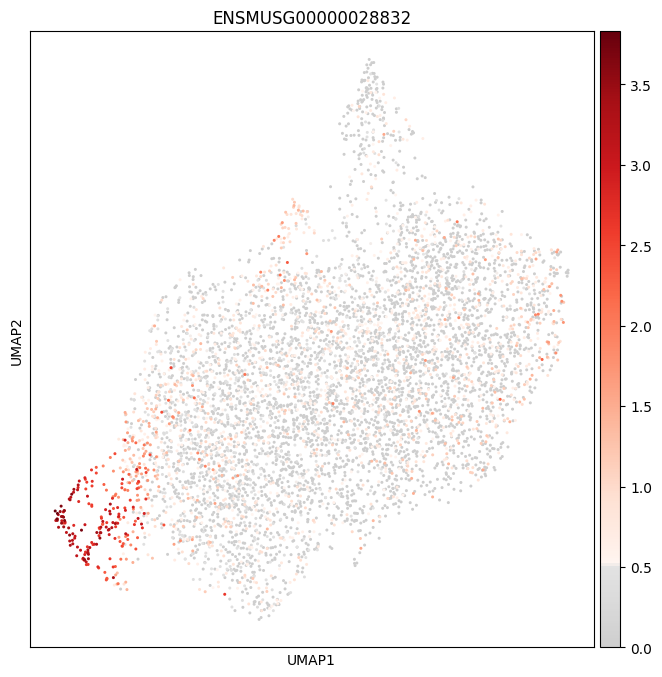

Encrypted symbol for  Ran is  ENSMUSG00000029430


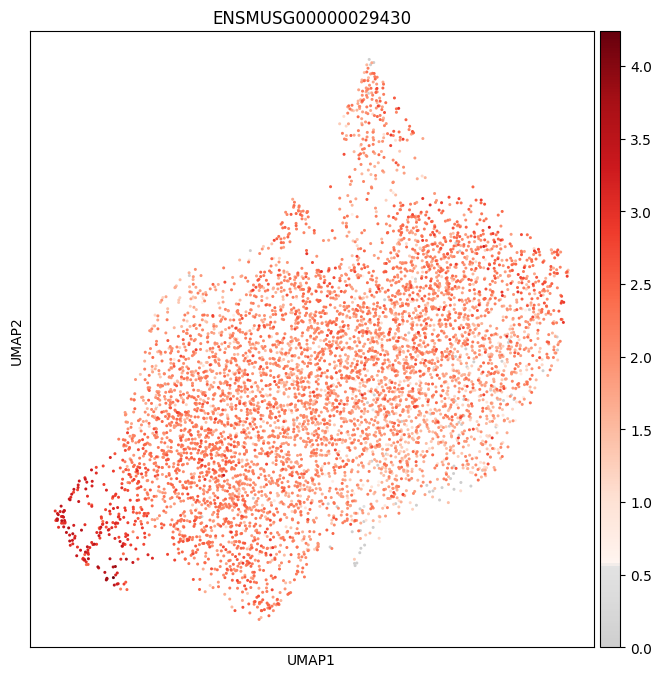

Encrypted symbol for  Snrpg is  ENSMUSG00000057278


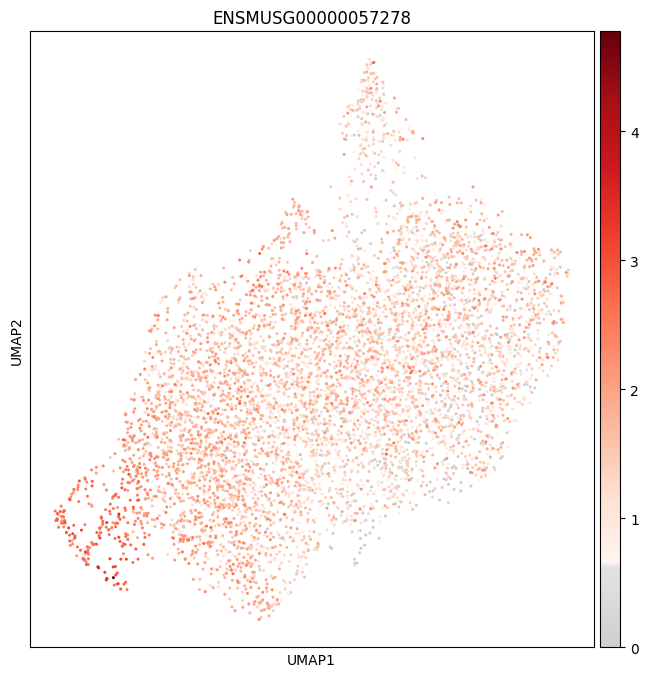

Encrypted symbol for  Hmgb1 is  ENSMUSG00000066551


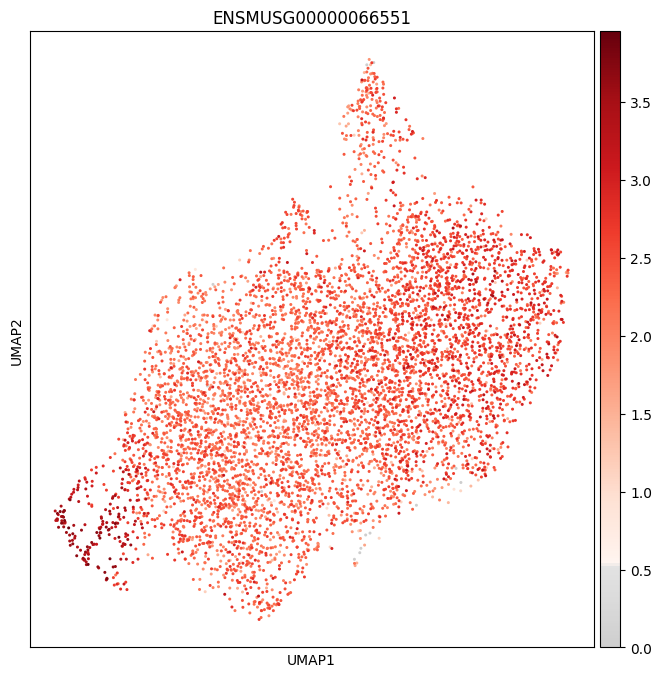

Encrypted symbol for  Lsm5 is  ENSMUSG00000091625


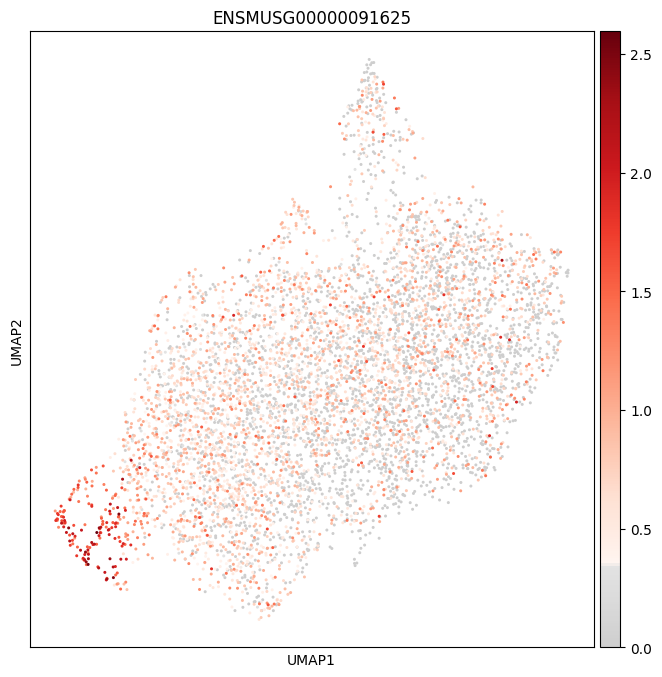

In [18]:
gene_symbols = ['Ptma', 'Stmn1', 'Ran', 'Snrpg', 'Hmgb1', 'Lsm5']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/3_thick_branched_Cluster4_' + gene_symbol + '.pdf')


Encrypted symbol for  Gphn is  ENSMUSG00000047454


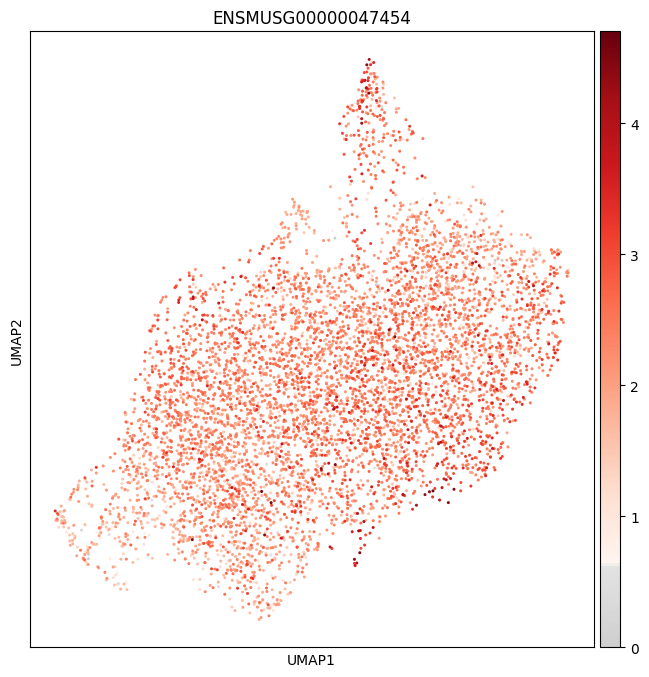

In [19]:
gene_symbols = ['Gphn']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/3_thick_branched_Cluster5_' + gene_symbol + '.pdf')
